<a href="https://colab.research.google.com/github/RebekahJasper/Capstone-Project/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/merge-csv.com__67dc42480fe41.csv")

In [ ]:
print(data.head())

      Date  Facebook   Digg  StumbleUpon  Twitter   Mixx  Delicious  YouTube  \
0  2009-04     13.40  34.14        17.85     5.23  14.74       0.73      0.0   
1  2009-05     14.80  37.11        15.46     6.12  12.33       1.08      0.0   
2  2009-06     16.06  41.28        14.23     7.37   3.74       1.55      0.0   
3  2009-07     19.87  31.32        13.00    17.74   6.19       2.07      0.0   
4  2009-08     23.00  36.08        10.83    13.08   5.68       1.04      0.0   

   reddit  Yahoo! Buzz  ...  MySpace  BallHype  Propeller  \
0    3.98         3.26  ...     2.48      1.40       0.49   
1    3.19         3.63  ...     1.44      0.48       0.41   
2    7.19         1.78  ...     1.27      0.84       0.45   
3    4.35         1.99  ...     0.29      0.14       0.25   
4    3.63         2.17  ...     0.45      0.25       0.24   

   news.ycombinator.com  FriendFeed  NowPublic  Kaboodle  Vimeo  Fark  Other  
0                  0.16        0.15       0.21      0.06    0.0  0.01   0

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  193 non-null    object 
 1   Facebook              193 non-null    float64
 2   Digg                  193 non-null    float64
 3   StumbleUpon           193 non-null    float64
 4   Twitter               193 non-null    float64
 5   Mixx                  193 non-null    float64
 6   Delicious             193 non-null    float64
 7   YouTube               193 non-null    float64
 8   reddit                193 non-null    float64
 9   Yahoo! Buzz           193 non-null    float64
 10  LinkedIn              180 non-null    float64
 11  orkut                 156 non-null    float64
 12  MySpace               120 non-null    float64
 13  BallHype              72 non-null     float64
 14  Propeller             60 non-null     float64
 15  news.ycombinator.com  6

In [ ]:
print(data.describe())

         Facebook        Digg  StumbleUpon     Twitter        Mixx  \
count  193.000000  193.000000   193.000000  193.000000  193.000000   
mean    75.834974   10.476114     4.659275    2.804922    1.977202   
std     19.638694   10.734798     3.432402    2.364929    2.085771   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%     67.410000    3.000000     2.050000    1.280000    0.900000   
50%     80.810000    5.720000     4.140000    2.410000    1.450000   
75%     89.290000   16.380000     6.320000    3.530000    2.300000   
max     97.290000   41.280000    17.850000   17.740000   14.740000   

        Delicious     YouTube      reddit  Yahoo! Buzz    LinkedIn  ...  \
count  193.000000  193.000000  193.000000   193.000000  180.000000  ...   
mean     0.854715    0.592591    0.417617     0.310363    0.206889  ...   
std      1.335993    1.290756    0.843924     0.755683    0.462312  ...   
min      0.000000    0.000000    0.000000     0.000000    0.000000  .

In [ ]:
print(data.isnull().sum())

Date                      0
Facebook                  0
Digg                      0
StumbleUpon               0
Twitter                   0
Mixx                      0
Delicious                 0
YouTube                   0
reddit                    0
Yahoo! Buzz               0
LinkedIn                 13
orkut                    37
MySpace                  73
BallHype                121
Propeller               133
news.ycombinator.com    133
FriendFeed              145
NowPublic               145
Kaboodle                145
Vimeo                   145
Fark                    169
Other                   169
dtype: int64


In [ ]:
data['Date']=pd.to_datetime(data['Date'],format='%Y-%m')
data.set_index('Date',inplace=True)

In [ ]:
selected_platforms=['Facebook','Twitter','YouTube','LinkedIn']
data=data[selected_platforms]

In [ ]:
data.fillna(method='ffill',inplace=True)

<ipython-input-10-a0cc4a31051a>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill',inplace=True)


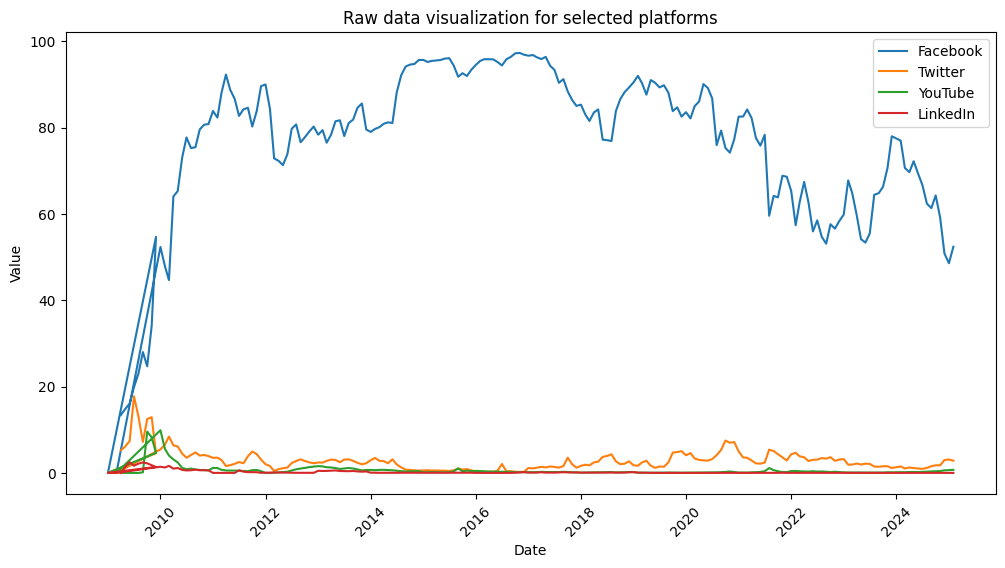

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Raw data visualization for selected platforms")
for column in data.columns:
  plt.plot(data.index,data[column],label=column)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_scaled=pd.DataFrame(scaler.fit_transform(data),columns=data.columns,index=data.index)

In [ ]:
print(data.describe())

         Facebook     Twitter     YouTube    LinkedIn
count  193.000000  193.000000  193.000000  193.000000
mean    75.834974    2.804922    0.592591    0.192953
std     19.638694    2.364929    1.290756    0.449404
min      0.000000    0.000000    0.000000    0.000000
25%     67.410000    1.280000    0.130000    0.000000
50%     80.810000    2.410000    0.240000    0.020000
75%     89.290000    3.530000    0.570000    0.090000
max     97.290000   17.740000    9.880000    2.490000


In [ ]:
#ARIMA
forecast_results = {}
seq_length = 5
for column in data.columns:
  data_feature=data_scaled[column]
  from statsmodels.tsa.arima.model import ARIMA
  order=(5,1,0)
  model=ARIMA(data_feature,order=order)
  model_fit=model.fit()
  pred_arima=model_fit.forecast(steps=12)
  pred_arima
  #LSTM
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import LSTM,Dense
  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import MeanSquaredError
  from tensorflow.keras.callbacks import EarlyStopping
  from sklearn.metrics import mean_squared_error
  def create_dataset(data,seq_length=5):
    X,y=[],[]
    for i in range(len(data)-seq_length):
      X.append(data[i:i+seq_length])
      y.append(data[i+seq_length])
    return np.array(X),np.array(y)
  comparison_table = []

for column in data.columns:
    data_feature = data_scaled[column]

    # ARIMA Model
    order = (5, 1, 0)
    model = ARIMA(data_feature, order=order)
    model_fit = model.fit()
    pred_arima = model_fit.forecast(steps=12)
    X,y=create_dataset(data_feature.values,seq_length)
    if len(X)<12:
      continue
  # Reshape input for the LSTM
    X_train, y_train=X[:-12],y[:-12]
    X_test, y_test=X[-12:],y[-12:]
  #Build LSTM model
    model_lstm=Sequential([
        LSTM(50,activation='relu',return_sequences=True,input_shape=(seq_length,1)),
        LSTM(50,activation='relu'),
        Dense(1)
        ])
    model_lstm.compile(optimizer=Adam(learning_rate=0.001),loss=MeanSquaredError())
  #Train the model
    early_stopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
    model_lstm.fit(X_train,y_train,epochs=100,batch_size=8,verbose=0,callbacks=[early_stopping])
    y_predy_pred_lstm=model_lstm.predict(X_test)

    # Create a new scaler for this column
    scaler_column = MinMaxScaler(feature_range=(0, 1))
    # Fit the scaler on the original data for this column only
    scaler_column.fit(data[[column]])

    # Reshape to (12, 1) before inverse_transform
    y_pred_lstm = scaler_column.inverse_transform(y_predy_pred_lstm.reshape(-1, 1))


    pred_arima_reshaped = pred_arima.values.reshape(-1, 1)
    # Inverse transform using a scaler fitted on a single feature
    #pred_arima_inverse = scaler.inverse_transform(pred_arima_reshaped) #Fixed: Removing this line to create a new scaler

    # Create a new MinMaxScaler for this column if you haven't already
    #scaler_column = MinMaxScaler(feature_range=(0, 1)) # This line is redundant as you've created it above
    # Fit the scaler on the original data for this column
    #scaler_column.fit(data[[column]]) # This line is redundant as you've fitted it above

    # Inverse transform the predictions using the column-specific scaler
    pred_arima_inverse = scaler_column.inverse_transform(pred_arima_reshaped)

    rmse_arima = np.sqrt(mean_squared_error(scaler_column.inverse_transform(y_test.reshape(-1,1)), pred_arima_inverse))
    rmse_lstm = np.sqrt(mean_squared_error(scaler_column.inverse_transform(y_test.reshape(-1,1)), y_pred_lstm))

    comparison_table.append({
        'Platform': column,
        'ARIMA_RMSE': rmse_arima,
        'LSTM_RMSE': rmse_lstm
    })
    forecast_results[column]={
      'ARIMA':pred_arima,
      'LSTM':y_pred_lstm.flatten()
      }


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


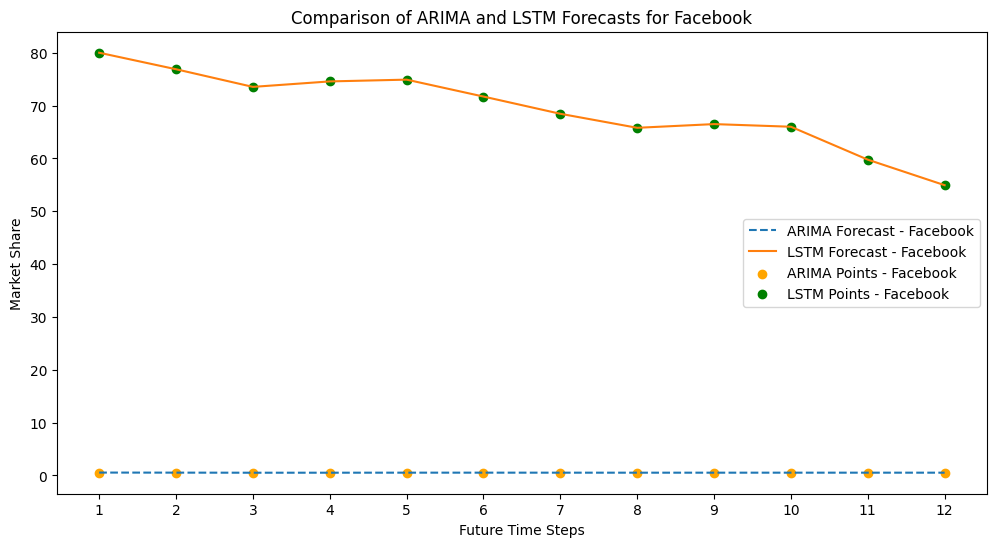

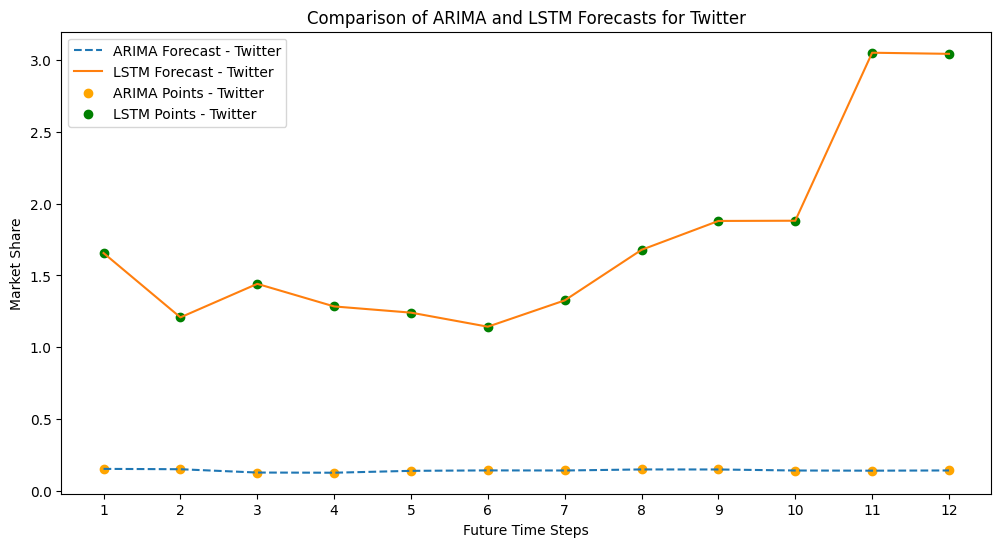

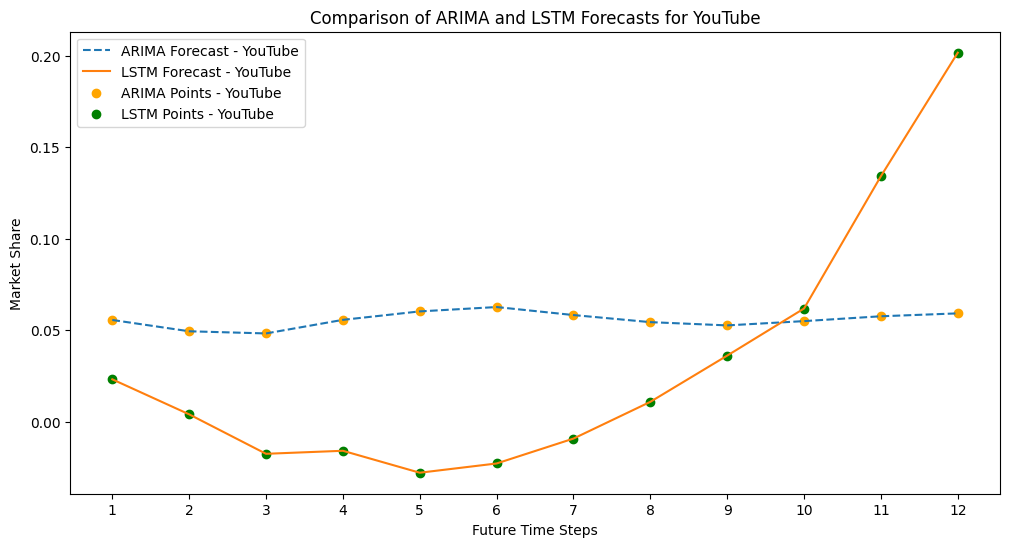

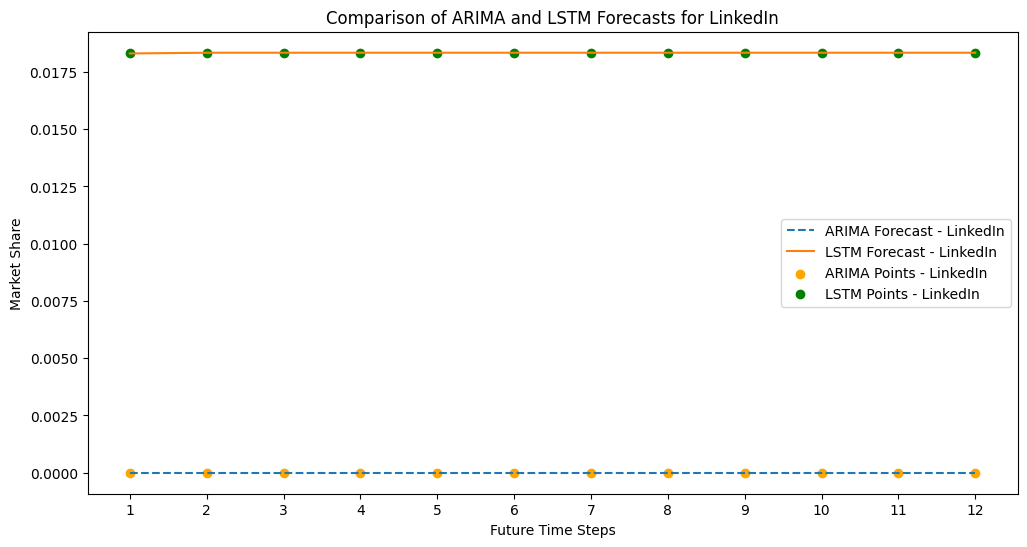

In [ ]:
for column in data.columns:
    if column in forecast_results:
        plt.figure(figsize=(12,6))
        plt.title(f"Comparison of ARIMA and LSTM Forecasts for {column}")
        plt.plot(range(1, 13), forecast_results[column]['ARIMA'], label=f'ARIMA Forecast - {column}', linestyle='dashed')
        plt.plot(range(1, 13), forecast_results[column]['LSTM'], label=f'LSTM Forecast - {column}', linestyle='solid')
        plt.scatter(range(1, 13), forecast_results[column]['ARIMA'], color='orange', label=f'ARIMA Points - {column}')
        plt.scatter(range(1, 13), forecast_results[column]['LSTM'], color='green', label=f'LSTM Points - {column}')
        plt.legend()
        plt.xlabel('Future Time Steps')
        plt.ylabel('Market Share')
        plt.xticks(range(1, 13))
        plt.show()

In [ ]:
comparison_df = pd.DataFrame(comparison_table)
print("\nComparison of ARIMA and LSTM Model RMSE Values for Each Platform:")
print(comparison_df)


Comparison of ARIMA and LSTM Model RMSE Values for Each Platform:
   Platform    ARIMA_RMSE  LSTM_RMSE
0  Facebook  1.299384e+01   4.205033
1   Twitter  1.118959e+00   0.525755
2   YouTube  2.519475e-01   0.080083
3  LinkedIn  1.177475e-35   0.027888
